In [ ]:
#################################
#Import all the modules
#################################
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import os
import librosa
from torch.utils.data import Dataset
import torch
from sklearn import mixture
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torchaudio
import pickle
import random
import seaborn as sns
from sklearn.metrics import roc_curve

In [33]:
starts_with_map = {
    'HIM046_0.8_cdsw_1.wav': 'Hin',
    'HIM046_0.8_cdsw_2.wav': 'Eng',
    # 'HIM046_0.8_cdsw_3.wav': 'Eng',
    'HIM046_0.8_cdsw_4.wav': 'Hin',
    'HIM046_0.8_cdsw_5.wav': 'Eng',
    'HIM046_0.8_cdsw_6.wav': 'Hin',
    'HIM046_0.8_cdsw_7.wav': 'Hin',
    'HIM046_0.8_cdsw_8.wav': 'Hin',
    # 'HIM046_0.8_cdsw_9.wav': 'Hin',
    'HIM046_0.8_cdsw_10.wav': 'Eng',
    'HIM046_0.8_cdsw_11.wav': 'Hin',
    'HIM046_0.8_cdsw_12.wav': 'Hin',
    # 'HIM046_0.8_cdsw_13.wav': 'Hin',
    'HIM046_0.8_cdsw_14.wav': 'Hin',
    'HIM046_0.8_cdsw_15.wav': 'Eng',
    'HIM046_0.8_cdsw_16.wav': 'Eng',
    # 'HIM046_0.8_cdsw_17.wav': 'Hin',
    'HIM046_0.8_cdsw_18.wav': 'Hin',
    'HIM046_0.8_cdsw_19.wav': 'Eng',
    # 'HIM046_0.8_cdsw_20.wav': 'Hin',
    'HIM046_0.8_cdsw_21.wav': 'Hin',
    'HIM046_0.8_cdsw_22.wav': 'Eng',
    'HIM046_0.8_cdsw_23.wav': 'Hin',
    'HIM046_0.8_cdsw_24.wav': 'Eng',
    'HIM046_0.8_cdsw_25.wav': 'Hin',
    # 'HIM046_0.8_cdsw_26.wav': 'Hin',
    # 'HIM046_0.8_cdsw_27.wav': 'Hin',
    'HIM046_0.8_cdsw_28.wav': 'Hin',
    'HIM046_0.8_cdsw_29.wav': 'Eng',
    'HIM046_0.8_cdsw_30.wav': 'Hin',
    # 'HIM046_0.8_cdsw_31.wav': 'Hin',
    'HIM046_0.8_cdsw_32.wav': 'Hin',
    'HIM046_0.8_cdsw_33.wav': 'Hin',
    'HIM046_0.8_cdsw_34.wav': 'Hin',
    # 'HIM046_0.8_cdsw_35.wav': 'Hin',
    'HIM046_0.8_cdsw_36.wav': 'Hin',
    'HIM046_0.8_cdsw_37.wav': 'Hin',
    # 'HIM046_0.8_cdsw_38.wav': 'Hin',
    # 'HIM046_0.8_cdsw_39.wav': 'Hin',
    # 'HIM046_0.8_cdsw_40.wav': 'Hin',
    'HIM046_0.8_cdsw_41.wav': 'Hin',
    'HIM046_0.8_cdsw_42.wav': 'Hin',
    # 'HIM046_0.8_cdsw_43.wav': 'Hin',
    'HIM046_0.8_cdsw_44.wav': 'Eng',
    # 'HIM046_0.8_cdsw_45.wav': 'Hin',
    'HIM046_0.8_cdsw_46.wav': 'Hin',
    # 'HIM046_0.8_cdsw_47.wav': 'Hin',
    
    'HIM046_1_cdsw_1.wav': 'Hin',
    'HIM046_1_cdsw_2.wav': 'Hin',
    'HIM046_1_cdsw_3.wav': 'Eng',
    'HIM046_1_cdsw_4.wav': 'Eng',
    'HIM046_1_cdsw_5.wav': 'Hin',
    # 'HIM046_1_cdsw_6.wav': 'Hin',
    'HIM046_1_cdsw_7.wav': 'Eng',
    # 'HIM046_1_cdsw_8.wav': 'Eng',
    'HIM046_1_cdsw_9.wav': 'Hin',
    'HIM046_1_cdsw_10.wav': 'Eng',
    'HIM046_1_cdsw_11.wav': 'Hin',
    'HIM046_1_cdsw_12.wav': 'Hin',
    'HIM046_1_cdsw_13.wav': 'Hin',
    'HIM046_1_cdsw_14.wav': 'Eng',
    'HIM046_1_cdsw_15.wav': 'Eng',
    'HIM046_1_cdsw_16.wav': 'Eng',
    'HIM046_1_cdsw_17.wav': 'Hin',
    'HIM046_1_cdsw_18.wav': 'Hin',
    'HIM046_1_cdsw_19.wav': 'Eng',
    'HIM046_1_cdsw_20.wav': 'Eng',
    'HIM046_1_cdsw_21.wav': 'Hin',
    'HIM046_1_cdsw_22.wav': 'Hin',
    'HIM046_1_cdsw_23.wav': 'Eng',
    'HIM046_1_cdsw_24.wav': 'Eng',
    'HIM046_1_cdsw_25.wav': 'Hin',
    'HIM046_1_cdsw_26.wav': 'Hin',
    'HIM046_1_cdsw_27.wav': 'Eng',
    'HIM046_1_cdsw_28.wav': 'Hin',
    'HIM046_1_cdsw_29.wav': 'Eng',
    'HIM046_1_cdsw_30.wav': 'Eng',
    'HIM046_1_cdsw_31.wav': 'Hin',
    'HIM046_1_cdsw_32.wav': 'Hin',
    'HIM046_1_cdsw_33.wav': 'Hin',
    'HIM046_1_cdsw_34.wav': 'Eng',
    
    
    'HIM046_2_cdsw_1.wav': 'Hin',
    'HIM046_2_cdsw_2.wav': 'Eng',
    'HIM046_2_cdsw_3.wav': 'Hin',
    'HIM046_2_cdsw_4.wav': 'Hin',
    'HIM046_2_cdsw_5.wav': 'Eng',
    'HIM046_2_cdsw_6.wav': 'Eng',
    'HIM046_2_cdsw_7.wav': 'Eng',
    'HIM046_2_cdsw_8.wav': 'Hin',
    'HIM046_2_cdsw_9.wav': 'Hin',
    'HIM046_2_cdsw_10.wav': 'Hin',
    'HIM046_2_cdsw_11.wav': 'Hin',
    'HIM046_2_cdsw_12.wav': 'Eng',
    'HIM046_2_cdsw_13.wav': 'Hin',
    'HIM046_2_cdsw_14.wav': 'Hin',
    'HIM046_2_cdsw_15.wav': 'Eng',
    'HIM046_2_cdsw_16.wav': 'Eng',
    'HIM046_2_cdsw_17.wav': 'Eng',
    'HIM046_2_cdsw_18.wav': 'Hin',
    'HIM046_2_cdsw_19.wav': 'Hin',
    'HIM046_2_cdsw_20.wav': 'Eng',
    'HIM046_2_cdsw_21.wav': 'Eng',
    'HIM046_2_cdsw_22.wav': 'Eng',
    'HIM046_2_cdsw_23.wav': 'Hin',
    'HIM046_2_cdsw_24.wav': 'Hin',
    'HIM046_2_cdsw_25.wav': 'Eng',
    'HIM046_2_cdsw_26.wav': 'Eng',
    'HIM046_2_cdsw_27.wav': 'Eng',
    'HIM046_2_cdsw_28.wav': 'Hin',
    
    'HIM046_5_cdsw_1.wav': 'Eng',
    'HIM046_5_cdsw_2.wav': 'Eng',
    'HIM046_5_cdsw_3.wav': 'Hin',
    'HIM046_5_cdsw_4.wav': 'Eng',
    'HIM046_5_cdsw_5.wav': 'Eng',
    'HIM046_5_cdsw_6.wav': 'Hin',
    'HIM046_5_cdsw_7.wav': 'Hin',
    'HIM046_5_cdsw_8.wav': 'Hin',
    'HIM046_5_cdsw_9.wav': 'Eng',
    'HIM046_5_cdsw_10.wav': 'Eng',
    'HIM046_5_cdsw_11.wav': 'Hin',
    'HIM046_5_cdsw_12.wav': 'Eng',
    'HIM046_5_cdsw_13.wav': 'Hin',
    'HIM046_5_cdsw_14.wav': 'Hin',
    'HIM046_5_cdsw_15.wav': 'Eng',
    
    
    'HIM046_7_cdsw_1.wav': 'Hin',
    'HIM046_7_cdsw_2.wav': 'Eng',
    'HIM046_7_cdsw_3.wav': 'Eng',
    'HIM046_7_cdsw_4.wav': 'Hin',
    'HIM046_7_cdsw_5.wav': 'Hin',
    'HIM046_7_cdsw_6.wav': 'Hin',
    'HIM046_7_cdsw_7.wav': 'Hin',
    'HIM046_7_cdsw_8.wav': 'Eng',
    'HIM046_7_cdsw_9.wav': 'Eng',
    'HIM046_7_cdsw_10.wav': 'Hin',
    'HIM046_7_cdsw_11.wav': 'Eng',
    'HIM046_7_cdsw_12.wav': 'Eng',
}

In [ ]:
lengths = []

for dirpath, dirnames, filenames in os.walk('wav_file_syn_cd_sw_awgn'):
    
    for file in filenames:
        
        if file[:3] == 'HIM':
            
            p = dirpath.replace('\\', '/') + '/'+ file
            
            if file in starts_with_map.keys():
                
                sig, rate = sf.read(p)
                
                lengths.append(len(sig))
                             

In [ ]:
sns.histplot(lengths, bins=30, kde=False, color='blue')

# Add labels and title
plt.xlabel('Signal lengths')
plt.ylabel('Frequency')
plt.title('Histogram of Signal lengths')
plt.grid()
# Show the plot
plt.show()

In [37]:
FRAME_LENGTH = 0.25
HOP_LENGTH = 0.05

In [38]:
def process_file(path, starts_with = 'Hin'):
    
    """
    Returns Frames, labels corresponding to each frame

    Returns:
        _Frames_ : Signal split into frames
        
        _labels_ : 0 if frame is in Hindi, 1 if frame is in English
    """
    assert starts_with in ['Hin', 'Eng']
    
    _, duration, filename = path.split('/')
    duration = float(duration)
    
    sig, rate = sf.read(path)

    Frames = librosa.util.frame(sig, frame_length=int(rate*FRAME_LENGTH), hop_length=int(rate*HOP_LENGTH)).T
    labels = []
    
    for index, frame in enumerate(Frames):
        
        start = index * int(rate * HOP_LENGTH) 
        
        for i in range(100):
            
            if i * duration <= float(start / rate) < (i+1) * duration:
                
                if i%2 == 0:
                    
                    labels.append(0) 
                else:
                    
                    labels.append(1)
            
                break
            
    labels = np.array(labels)  
      
    if starts_with == 'Eng':
        labels = 1 -labels  
              
    return Frames, labels

In [83]:
def Energy(frame):
    """
    Returns the energy of the signal

    :frame:
      a fixed window of speech signal
    """
    energy = np.dot(frame, frame)

    return energy


def remove_silence(frame, energy_threshold):

    if Energy(frame) < energy_threshold:
        frame.fill(0)

    return frame
    ##########################################################

In [82]:

def read_dir(data_dir = 'wav_file_syn_cd_sw_awgn'):
    
    """
    Args:
        data_dir (str, optional): path to the directory of audio files. Defaults to 'wav_file_syn_cd_sw_awgn'.

    Returns:
        signal: list of signals
        signal_labels: list of labels for each signal
        data: List of all frames of all signals
        labels: list of labels corresponding to each frame
    """
    
    data = np.array([0]*int(FRAME_LENGTH* 16000))
    labels = np.array([0])
    signal = []
    signal_labels = []
    
    for dirpath, dirnames, filenames in os.walk(data_dir):
        
        for file in filenames:
            
            if file[:3] == 'HIM':
                
                p = dirpath.replace('\\', '/') + '/'+ file
                
                if file in starts_with_map.keys():
                        
                    d, l = process_file(p, starts_with_map[file])
                    
                    frame_energies = np.apply_along_axis(Energy, axis=1, arr=d)

                    energy_threshold = (max(frame_energies)- min(frame_energies))* 0.02

                    mask = frame_energies <= energy_threshold

                    l[mask] = 2
                    # Use the mask to filter frames
                    filtered_frames = d
                    filtered_l = l
                    
                    data = np.vstack((data, filtered_frames))
                    labels = np.concatenate((labels, filtered_l))
                    signal.append(sf.read(p)[0])
                    signal_labels.append(filtered_l)
    
    return signal, signal_labels, data[1:, :], labels[1:]         
        

In [41]:
signals, signal_labels, data, labels = read_dir()

In [42]:
## Pad signals to same length, append labels as per padded length; padded with 0's and labeled as silent

longest_signal = max(signals, key=len)
len_longest = len(longest_signal)
Frames = librosa.util.frame(longest_signal, frame_length=int(16000*0.025), hop_length=int(16000*0.02)).T
max_frames = Frames.shape[0]

padded_signals = []
padded_labels = []

for signal in signals:
    
    padded_signals.append(np.pad(signal, (0, len_longest - len(signal)), mode='constant', constant_values=0))
    
for label in signal_labels:
    
    padded_labels.append(np.pad(label, (0, max_frames - label.shape[0]), mode = 'constant', constant_values=2))

In [31]:
np.save('signals.npy', padded_signals)

np.save('labels.npy', padded_labels)

In [43]:
def split_list(input_list, ratio=0.8):
    # Shuffle the list to ensure randomness
    random.shuffle(input_list)

    # Calculate the split index based on the given ratio
    split_index = int(ratio * len(input_list))

    # Divide the list into two disjoint lists
    list_1 = input_list[:split_index]
    list_2 = input_list[split_index:]

    return list_1, list_2

train_indices, test_indices = split_list(np.arange(len(data)))

In [150]:
with open('train_indices.pkl', 'wb') as f:
    
    pickle.dump(train_indices, f)
    
with open('test_indices.pkl', 'wb') as f:
    
    pickle.dump(test_indices, f)
    
with open('train_indices.pkl', 'rb') as f:
    
    train_indices = pickle.load(f)
    
with open('test_indices.pkl', 'rb') as f:
    
    test_indices = pickle.load(f)

In [44]:
train_data, train_labels = data[train_indices], labels[train_indices]

test_data, test_labels = data[test_indices], labels[test_indices]

<h1> GMM </h1>

In [46]:

def CMVN(frames):
    
    """
    Returns frames after Cepstral Mean Variance Normalization
    
    Args:
        frames: List of frames of a signal
    """
    
    # Compute mean across the frames
    mean = np.mean(frames, axis=0)

    # Compute variance using broadcasting
    variance = np.mean((frames - mean) ** 2, axis=0)

    # Normalize frames
    normalized_frames = (frames - mean) / np.sqrt(variance + 1e-6)

    return normalized_frames


def feature_vector(frames, rate = 16000):
    
    """
    Returns a vector of MFCC, velocity and acceleration coefficients for each frame
    
    Args:
        frames: List of frames of a signal
    """

    mfcc_coeffs = librosa.feature.mfcc(y=frames, sr=rate, n_mels = 40, n_mfcc = 30, n_fft = int(rate * FRAME_LENGTH))[:,:,0]
    normalized = CMVN(mfcc_coeffs)
    delta = librosa.feature.delta(normalized)
    delta_delta = librosa.feature.delta(normalized, order=2) 

    return np.hstack((mfcc_coeffs, delta, delta_delta))


def read_dir_mfcc(data_dir = 'wav_file_syn_cd_sw_awgn'):
    
    """
    Args:
        data_dir (str, optional): path to the directory of audio files. Defaults to 'wav_file_syn_cd_sw_awgn'.

    Returns:
        data: list of feature vectors of each frame
        labels: list of labels corresponding to each frame
    """
    
    data = np.array([0]*90)
    labels = np.array([0])
    for dirpath, dirnames, filenames in os.walk(data_dir):
        
        for file in filenames:
            
            if file[:3] == 'HIM':
                
                p = dirpath.replace('\\', '/') + '/'+ file
                
                if file in starts_with_map.keys():
   
                    d, l = process_file(p, starts_with_map[file])
                    
                    mfcc_rep = feature_vector(d)
                    
                    data = np.vstack((data, mfcc_rep))
                    labels = np.concatenate((labels, l))
    
    
    return data[1:, :], labels[1:] 

In [47]:
data, labels = read_dir_mfcc()

train_data, train_labels = data[train_indices], labels[train_indices]

test_data, test_labels = data[test_indices], labels[test_indices]

In [90]:
np.save('train_indices.npy', train_indices)
np.save('test_indices.npy', test_indices)

In [48]:
hindi_data = train_data[train_labels == 0]
english_data = train_data[train_labels == 1]

hindi_data.shape, english_data.shape, train_data.shape

((14090, 90), (14086, 90), (28176, 90))

In [49]:
test_data.shape

(7044, 90)

In [50]:
hindi_GMM = mixture.GaussianMixture(
    n_components=128, 
    covariance_type='full',
    max_iter=200,
    tol=1e-4,
    verbose=2
    )

english_GMM = mixture.GaussianMixture(
    n_components= 128, 
    covariance_type='full',
    max_iter=200,
    tol=1e-4,
    verbose=2
    )

In [51]:
hindi_GMM.fit(hindi_data)

Initialization 0
  Iteration 10	 time lapse 26.32186s	 ll change 0.06829
  Iteration 20	 time lapse 25.61039s	 ll change 0.04677
  Iteration 30	 time lapse 25.96945s	 ll change 0.05744
  Iteration 40	 time lapse 25.16328s	 ll change 0.04972
  Iteration 50	 time lapse 25.17715s	 ll change 0.02620
  Iteration 60	 time lapse 25.54410s	 ll change 0.04993
  Iteration 70	 time lapse 26.64171s	 ll change 0.07078
  Iteration 80	 time lapse 26.11406s	 ll change 0.00037
  Iteration 90	 time lapse 25.82893s	 ll change 0.00093
Initialization converged. time lapse 242.60456s	 lower bound 207.45614.


GaussianMixture(max_iter=200, n_components=128, tol=0.0001, verbose=2)

In [52]:
english_GMM.fit(english_data)

Initialization 0
  Iteration 10	 time lapse 26.63544s	 ll change 0.03335
  Iteration 20	 time lapse 26.27653s	 ll change 0.04308
  Iteration 30	 time lapse 25.68876s	 ll change 0.10687
  Iteration 40	 time lapse 26.07825s	 ll change 0.08230
  Iteration 50	 time lapse 25.24973s	 ll change 0.01522
  Iteration 60	 time lapse 25.43581s	 ll change 0.00652
  Iteration 70	 time lapse 24.90546s	 ll change 0.00157
  Iteration 80	 time lapse 25.50446s	 ll change 0.00240
Initialization converged. time lapse 221.70133s	 lower bound 205.52065.


GaussianMixture(max_iter=200, n_components=128, tol=0.0001, verbose=2)

In [53]:
def classify_frame(frame):
    hindi_score = hindi_GMM.score(frame.reshape(1, -1))  # Log-likelihood for Hindi 
    english_score = english_GMM.score(frame.reshape(1, -1))  # Log-likelihood for English
    return 0 if hindi_score > english_score else 1  # 0: Hindi, 1: English

def likelihood_ratio(frame):
    hindi_score = hindi_GMM.score(frame.reshape(1, -1))  # Log-likelihood for Hindi 
    english_score = english_GMM.score(frame.reshape(1, -1))  # Log-likelihood for English
    return english_score - hindi_score

In [54]:
correct = 0

for index, frame in enumerate(test_data):
    
    if classify_frame(frame) == test_labels[index]:
        
        correct +=1

correct/ len(test_data)  

0.6459398069278819

In [55]:
preds = []

for index, frame in enumerate(test_data):
    
    preds.append(likelihood_ratio(frame))
    
preds

[np.float64(-33.6019872524886),
 np.float64(-22.75052498012306),
 np.float64(37.48604855809427),
 np.float64(-5.471566237132265),
 np.float64(-22.01639909708183),
 np.float64(-10.159861795040968),
 np.float64(-5.489988980672621),
 np.float64(7.577342288585385),
 np.float64(12.501315781422647),
 np.float64(6.480183421146535),
 np.float64(-26.303108124220614),
 np.float64(-6.416746315115034),
 np.float64(15.612977629031889),
 np.float64(-9.322426959346274),
 np.float64(-15.094160458403167),
 np.float64(38.27741071252407),
 np.float64(56.054636633345254),
 np.float64(-15.99157319564523),
 np.float64(0.30550316248260856),
 np.float64(48.871926732362766),
 np.float64(1.5896579704120484),
 np.float64(4.5887126345587035),
 np.float64(-16.927868544165335),
 np.float64(-27.289040056364357),
 np.float64(44.1579209923994),
 np.float64(23.02063047641562),
 np.float64(-37.45995283367478),
 np.float64(-2.02241544503903),
 np.float64(-72.02941682263861),
 np.float64(8.39375872718395),
 np.float64(47.

0.3535664335664336 0.23928359422701817


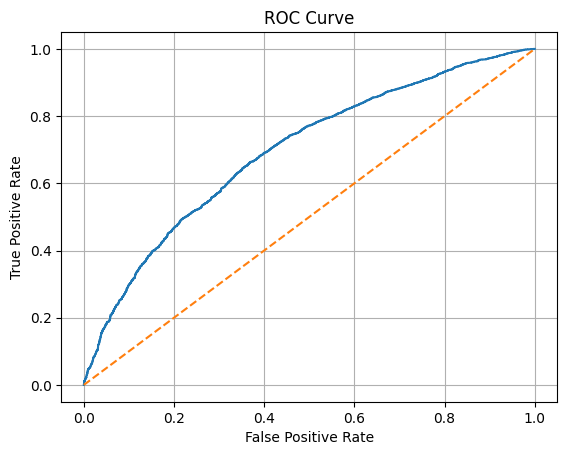

In [58]:
fpr, tpr, thresholds = roc_curve(test_labels, preds)
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer_threshold = thresholds[np.nanargmin(np.abs(fpr - (1 - tpr)))]
print(eer, eer_threshold)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, len(fpr)), np.linspace(0, 1, len(fpr)), linestyle='--')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<h1> GMM-UBM </h1>

In [59]:
def read_dir_mfcc_UBM(data_dir = 'wav_file_syn_cd_sw_awgn'):
    
    data = np.array([0]*90)
    
    for dirpath, dirnames, filenames in os.walk(data_dir):
        
        for file in filenames:
            
            if file[:3] != 'HIM':
                
                p = dirpath.replace('\\', '/') + '/'+ file
    
                d, l = process_file(p)

                mfcc_rep = feature_vector(d)
                
                data = np.vstack((data, mfcc_rep))
    
    
    return data[1:, :]

In [60]:
UBM_data = read_dir_mfcc_UBM()
UBM_data.shape

(127540, 90)

In [71]:
UBM_model = mixture.GaussianMixture(
    n_components=128,
    covariance_type='full',
    verbose=2,
    max_iter=200
)

In [72]:
UBM_model.fit(UBM_data)

Initialization 0
  Iteration 10	 time lapse 258.39903s	 ll change 0.53752
  Iteration 20	 time lapse 243.01125s	 ll change 0.20288
  Iteration 30	 time lapse 246.90873s	 ll change 0.08356
  Iteration 40	 time lapse 250.30343s	 ll change 0.01464
  Iteration 50	 time lapse 242.28225s	 ll change 0.01116
  Iteration 60	 time lapse 248.55729s	 ll change 0.01160
  Iteration 70	 time lapse 246.05135s	 ll change 0.04689
  Iteration 80	 time lapse 234.92381s	 ll change 0.01972
  Iteration 90	 time lapse 245.20401s	 ll change 0.03694
  Iteration 100	 time lapse 243.68298s	 ll change 0.01630
  Iteration 110	 time lapse 247.81998s	 ll change 0.01616
  Iteration 120	 time lapse 247.34532s	 ll change 0.02225
  Iteration 130	 time lapse 238.99413s	 ll change 0.02599
  Iteration 140	 time lapse 234.20329s	 ll change 0.00241
  Iteration 150	 time lapse 239.12503s	 ll change 0.00349
Initialization converged. time lapse 3714.55808s	 lower bound 204.03918.


GaussianMixture(max_iter=200, n_components=128, verbose=2)

In [84]:
hindi_specific_model = mixture.GaussianMixture(
    n_components=128,
    covariance_type='full',
    verbose=2,
    max_iter=1
)

english_specific_model = mixture.GaussianMixture(
    n_components=128,
    covariance_type='full',
    verbose=2,
    max_iter=1
)

ubm_mean = UBM_model.means_
ubm_sigma = UBM_model.covariances_
ubm_pi = UBM_model.weights_

hindi_specific_model.means_ = np.copy(ubm_mean)
hindi_specific_model.covariances_ = np.copy(ubm_sigma)
hindi_specific_model.weights_ = np.copy(ubm_pi)

english_specific_model.means_ = np.copy(ubm_mean)
english_specific_model.covariances_ = np.copy(ubm_sigma)
english_specific_model.weights_ = np.copy(ubm_pi)

In [85]:
hindi_specific_model.fit(hindi_data)

Initialization 0
Initialization did not converge. time lapse 3.91829s	 lower bound 202.40525.


c:\Users\prana\OneDrive\Desktop\IITHyderabad\Speech Systems\myenv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


GaussianMixture(max_iter=1, n_components=128, verbose=2)

In [86]:
english_specific_model.fit(english_data)

Initialization 0
Initialization did not converge. time lapse 4.01780s	 lower bound 202.51676.


c:\Users\prana\OneDrive\Desktop\IITHyderabad\Speech Systems\myenv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


GaussianMixture(max_iter=1, n_components=128, verbose=2)

In [87]:
relevance_factor = 16
n_components = 128
alpha = n_components/ (n_components + relevance_factor) 

In [88]:
# Update means and pi's using MAP update while keeping covariances same as the UBM covariance
hindi_specific_model.means_ = (1 - alpha) * hindi_specific_model.means_ + alpha * ubm_mean
hindi_specific_model.weights_ = (1 - alpha) * hindi_specific_model.weights_ + alpha * ubm_pi
hindi_specific_model.covariances_ = np.copy(ubm_sigma)

In [89]:
english_specific_model.means_ = (1 - alpha) * english_specific_model.means_ + alpha * ubm_mean
english_specific_model.weights_ = (1 - alpha) * english_specific_model.weights_ + alpha * ubm_pi
english_specific_model.covariances_ = np.copy(ubm_sigma)

In [131]:
# Save trained model weights
with open("ubm_mean.pkl", "wb") as f:
    pickle.dump(ubm_mean, f)

with open("ubm_cov.pkl", "wb") as f:
    pickle.dump(ubm_sigma, f)
    
with open("ubm_pi.pkl", "wb") as f:
    pickle.dump(ubm_pi, f)

In [141]:
with open("hindi_specific.pkl", "wb") as f:
    pickle.dump(hindi_specific_model, f)
    
with open("english_specific.pkl", "wb") as f:
    pickle.dump(english_specific_model, f)

In [90]:
def ubm_likelihood_ratio(frame):
    hindi_score = hindi_specific_model.score(frame.reshape(1, -1))  # Log-likelihood for Hindi 
    english_score = english_specific_model.score(frame.reshape(1, -1))  # Log-likelihood for English
    return english_score - hindi_score

In [91]:
preds = []

for index, frame in enumerate(test_data):
    
    preds.append(ubm_likelihood_ratio(frame))
    
preds

[np.float64(129.72799814851948),
 np.float64(-71.62291311761304),
 np.float64(-17.810512037861542),
 np.float64(18.197291828922012),
 np.float64(-2.938363968734123),
 np.float64(-22.476210735667856),
 np.float64(-18.387758650128703),
 np.float64(68.9012775341123),
 np.float64(27.058466461760204),
 np.float64(37.23752373700586),
 np.float64(80.26801186930676),
 np.float64(-59.72347292637457),
 np.float64(-4.805924327446171),
 np.float64(-37.01879622452921),
 np.float64(-14.384469803271587),
 np.float64(46.76311854801084),
 np.float64(-19.40199424321858),
 np.float64(26.321995519037387),
 np.float64(142.36153670902132),
 np.float64(-95.88076880297356),
 np.float64(-66.96341245721312),
 np.float64(-59.27840508750056),
 np.float64(-116.11664960853635),
 np.float64(88.90324476464716),
 np.float64(82.38195739607289),
 np.float64(8.271812908761298),
 np.float64(66.90812766536047),
 np.float64(43.60407283275889),
 np.float64(169.03757390932364),
 np.float64(51.3181488259556),
 np.float64(12.28

0.4979020979020979 22.36346654602453


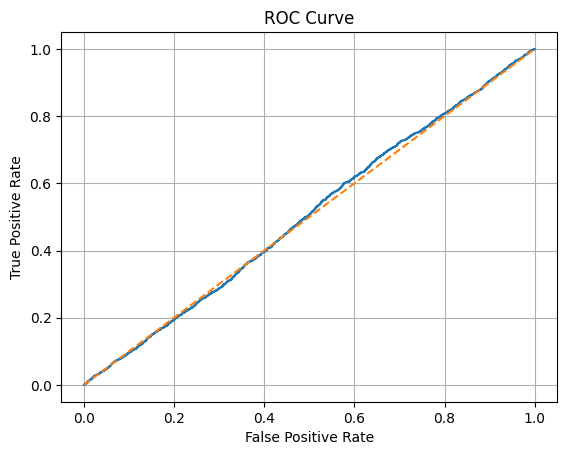

In [92]:
fpr, tpr, thresholds = roc_curve(test_labels, preds)
eer = fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))]
eer_threshold = thresholds[np.nanargmin(np.abs(fpr - (1 - tpr)))]
print(eer, eer_threshold)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, len(fpr)), np.linspace(0, 1, len(fpr)), linestyle='--')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()